# Learning Scikit-learn: Machine Learning in Python

## Notebook for Chapter 1: A Gentle Introduction to Machine Learning

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import scikit-learn, numpy and pyplot

In [2]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

Load Iris dataset

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print X_iris.shape, y_iris.shape
print X_iris[0], y_iris[0]


(150L, 4L) (150L,)
[5.1 3.5 1.4 0.2] 0


Create training and testing partitions and standarize data.

In [4]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# Get dataset with only the first two attributes
X, y = X_iris[:,:2], y_iris
# Split the dataset into a trainig and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)
print X_train.shape, y_train.shape
# Standarize the features
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)



(112L, 2L) (112L,)


d:\apps\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Plot the training data.

Text(0,0.5,'Sepal width')

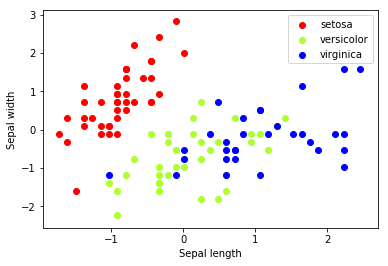

In [5]:

colors = ['red', 'greenyellow', 'blue']
for i in xrange(len(colors)):
    px = X_train[:, 0][y_train == i]
    py = X_train[:, 1][y_train == i]
    plt.scatter(px, py, c=colors[i])

plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Fit a Linear Classification method.

In [6]:
# create the linear model classifier
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
# fit (train) the classifier
clf.fit(X_train, y_train)
# print learned coeficients
print clf.coef_
print clf.intercept_

[[-36.01568352  19.13871055]
 [ -2.47557913 -24.27466832]
 [  8.94402784  -1.35666809]]
[-18.35409338 -15.32608729  -3.49430212]


d:\apps\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Plot the three decision curves. Note that Class 0 is linearly separable, while Class 1 and Class 2 are not

d:\apps\Anaconda2\lib\site-packages\matplotlib\pyplot.py:3361: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


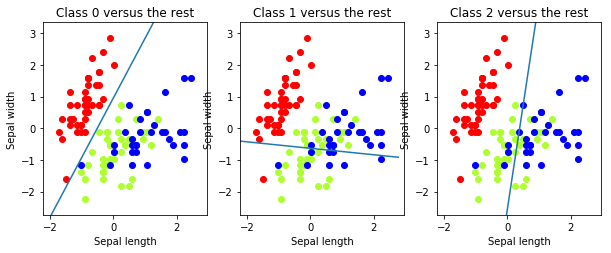

In [7]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min,x_max,0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10,6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class ' + str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    sca(axes[i])
    for j in xrange(len(colors)):
        px = X_train[:, 0][y_train == j]
        py = X_train[:, 1][y_train == j]
        plt.scatter(px, py, c=colors[j])
    ys = (-clf.intercept_[i]-xs*clf.coef_[i,0])/clf.coef_[i,1]
    plt.plot(xs,ys,hold=True)
    


Evaluate a particular instance

In [8]:

print clf.predict(scaler.transform([[4.7, 3.1]]))
print clf.decision_function(scaler.transform([[4.7, 3.1]]))

[0]
[[ 28.81482175 -14.50014663 -14.88741712]]


Measure accuracy on the training set

In [9]:
from sklearn import metrics
y_train_pred = clf.predict(X_train)
print metrics.accuracy_score(y_train, y_train_pred)

0.7857142857142857


Measure  accuracy on the testing set

In [10]:
y_pred = clf.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)


0.631578947368421


Evaluate results using Precision, Recall and F-score, and show the confusion matrix

In [11]:
print metrics.classification_report(y_test, y_pred, target_names=iris.target_names)
print metrics.confusion_matrix(y_test, y_pred)

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         8
 versicolor       0.20      0.09      0.13        11
  virginica       0.60      0.79      0.68        19

avg / total       0.57      0.63      0.59        38

[[ 8  0  0]
 [ 0  1 10]
 [ 0  4 15]]


Create a new classifier: a pipeline of the standarizer and the linear model. Measure the cross-validation accuracy.

In [12]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline

# create a composite estimator made by a pipeline of the standarization and the linear model
clf = Pipeline([
        ('scaler', StandardScaler()),
        ('linear_model', SGDClassifier())
])
# create a k-fold croos validation iterator of k=5 folds
cv = KFold(X.shape[0], 5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)
print scores



[0.53333333 0.73333333 0.8        0.83333333 0.76666667]


Calculate the mean and standard error of cross-validation accuracy

In [13]:
from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores))

print mean_score(scores)

Mean score: 0.733 (+/-0.053)
